# Text Similarity Algorithm 실습

## 1. n-gram

n-gram은 주어진 문장에서 n개의 연속적인 단어 시퀀스를 의미

서로 다른 문장을 n-gram으로 비교하면 단어의 출현 빈도에 기반한 유사도 계산

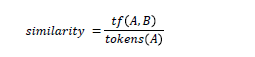

유사도 계산 방법

In [5]:
#어절 단위 n-gram
#추출된 토큰들은 튜플 형태로 반환
def word_ngram(bow, num_gram):
  text = tuple(bow)
  ngrams = [text[x:x+num_gram] for x in range(0,len(text))]
  return tuple(ngrams)

#유사도 계산
def similarity(doc1, doc2):
  cnt=0
  for token in doc1:
    if token in doc2:
      cnt=cnt+1
  return cnt/len(doc1)


In [6]:
from konlpy.tag import Komoran

sentence1 = '6월에 뉴턴은 선생님의 제안으로 티리니티에 입학하였다'
sentence2 = '6월에 뉴턴은 선생님의 제안으로 대학교에 입학하였다'
sentence3 = '나는 맛있는 밥을 뉴턴 선생님과 함께 먹었습니다'

#형태소 분석기에서 명사 추출
komoran = Komoran()
bow1 = komoran.nouns(sentence1)
bow2 = komoran.nouns(sentence2)
bow3 = komoran.nouns(sentence3)

#단어 n-gram 토큰 추출
doc1 = word_ngram(bow1,2)
doc2 = word_ngram(bow2,2)
doc3 = word_ngram(bow3,2)

#추출된 n-gram 토큰 출력
print(doc1)
print(doc2)
print(doc3)



(('6월', '뉴턴'), ('뉴턴', '선생님'), ('선생님', '제안'), ('제안', '티'), ('티', '리'), ('리', '티에'), ('티에', '입학'), ('입학',))
(('6월', '뉴턴'), ('뉴턴', '선생님'), ('선생님', '제안'), ('제안', '대학교'), ('대학교', '입학'), ('입학',))
(('밥', '뉴턴'), ('뉴턴', '선생'), ('선생', '님과 함께'), ('님과 함께',))


In [3]:
pip install konlpy

     |████████████████████████████████| 19.4MB 1.5MB/s 
     |████████████████████████████████| 460kB 39.6MB/s 
     |████████████████████████████████| 92kB 7.6MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [7]:
#유사도 계산
r1 = similarity(doc1,doc2)
r2 = similarity(doc3,doc1)

In [8]:
print(r1, r2)

0.5 0.0


n-gram은 모든 단어의 출현 빈도를 확인하는 것이 아닌, 연속되는 문장에서 일부 단어만 확인

전체 문장을 고려한 언어 모델보다 정확도가 떨어질 수 있다.

## 2. 코사인 유사도

단어나 문장을 벡터로 표현할 수 있다면 벡터 간 거리나 각도를 이용해 유사성 파악

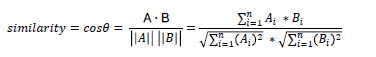

In [9]:
from konlpy.tag import Komoran
import numpy as np
from numpy import dot
from numpy.linalg import norm

#코사인 유사도 계산
def cos_sim(vec1, vec2):
  return dot(vec1, vec2)/(norm(vec1)*norm(vec2))

In [10]:
#TDM 만들기
#비교 문장에서 추출한 단어 사전을 기준으로 문장에 해당 단어들이
#얼마나 포함되어 있는지 보여주는 단어 문서 행렬 TDM만들기
def make_term_doc_mat(sentence_bow, word_dics):
  freq_mat = {}

  for word in word_dics:
    freq_mat[word]=0
  
  for word in word_dics:
    if word in sentence_bow:
      freq_mat[word]+=1
  
  return freq_mat

#단어 벡터 만들기
def make_vector(tdm):
  vec = []
  for key in tdm:
    vec.append(tdm[key])
  return vec

In [11]:
from konlpy.tag import Komoran

sentence1 = '6월에 뉴턴은 선생님의 제안으로 티리니티에 입학하였다'
sentence2 = '6월에 뉴턴은 선생님의 제안으로 대학교에 입학하였다'
sentence3 = '나는 맛있는 밥을 뉴턴 선생님과 함께 먹었습니다.'

#형태소 분석기를 이용해 단어 묶음 리스트 생성
komoran = Komoran()
bow1 = komoran.nouns(sentence1)
bow2 = komoran.nouns(sentence2)
bow3 = komoran.nouns(sentence3)

#단어 묶음 리스트를 하나로 합침 -> TDM을 위해서
bow = bow1+bow2+bow3

#단어 묶음에서 중복 제거하고 단어 사전 만들기
word_dics=[]
for token in bow:
  if token not in word_dics:
    word_dics.append(token)

#문장 별 단어 문서 행렬 계산
freq_list1 = make_term_doc_mat(bow1, word_dics)
freq_list2 = make_term_doc_mat(bow2, word_dics)
freq_list3 = make_term_doc_mat(bow3, word_dics)
print(freq_list1)
print(freq_list2)
print(freq_list3)

{'6월': 1, '뉴턴': 1, '선생님': 1, '제안': 1, '티': 1, '리': 1, '티에': 1, '입학': 1, '대학교': 0, '밥': 0, '선생': 0, '님과 함께': 0}
{'6월': 1, '뉴턴': 1, '선생님': 1, '제안': 1, '티': 0, '리': 0, '티에': 0, '입학': 1, '대학교': 1, '밥': 0, '선생': 0, '님과 함께': 0}
{'6월': 0, '뉴턴': 1, '선생님': 0, '제안': 0, '티': 0, '리': 0, '티에': 0, '입학': 0, '대학교': 0, '밥': 1, '선생': 1, '님과 함께': 1}


In [12]:
#문장 벡터 생성

doc1 = np.array(make_vector(freq_list1))
doc2 = np.array(make_vector(freq_list2))
doc3 = np.array(make_vector(freq_list3))

#코사인 유사도 계산
r1 = cos_sim(doc1,doc2)
r2 = cos_sim(doc3,doc1)
print(r1, r2)
#r1을 보면 유사도는 n-gram보다 높은 0.72로 정확도가 더 높다.
#그리고 r2에서는 그나마 n-gram보다 높은 0.17로 조금 연관이 있게 나왔다.

0.7216878364870323 0.17677669529663687
